In [1]:
# !pip install tensorflow_hub --user

In [1]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [18]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [19]:
img_shape + (3, )

(224, 224, 3)

In [20]:
img_shape = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape = img_shape + (3, ))
])

In [21]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [5]:
import numpy as np
import cv2

img_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'
img_local_addr = tf.keras.utils.get_file('image.jpg', img_url)
img_local_addr

73728/61306 [====================================] - 0s 0us/step


'C:\\Users\\encai\\.keras\\datasets\\image.jpg'

In [6]:
img = cv2.imread(img_local_addr, cv2.IMREAD_COLOR)
plt.imshow(img)

In [7]:
print(classifier.input_shape[1:])
print(img.shape)

(224, 224, 3)
(600, 512, 3)


In [8]:
classifier.input_shape[1:3]

(224, 224)

In [9]:
img = cv2.resize(img, classifier.input_shape[1:3])
img.shape

(224, 224, 3)

In [10]:
img_new = img[np.newaxis, ...]
img_new.shape

(1, 224, 224, 3)

In [11]:
img_new = np.array(img_new) / 255.0

In [12]:
result = classifier.predict(img_new)
result.shape

(1, 1001)

In [13]:
result[0][:5]

array([ 0.25035456,  1.4318867 , -0.12338006,  0.8153768 ,  0.74651015],
      dtype=float32)

In [14]:
predicted_class = np.argmax(result[0], axis = -1)
predicted_class

653

In [15]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0s/step


In [22]:
len(imagenet_labels)

1001

In [16]:
imagenet_labels[:10]

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock',
       'hen'], dtype='<U30')

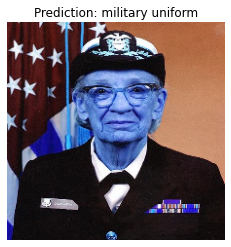

In [17]:
plt.imshow(img)
plt.axis("off")
plt.title("Prediction: " + imagenet_labels[predicted_class])
plt.show()

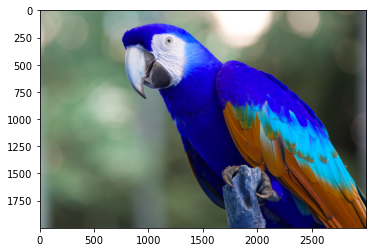

In [36]:
img = cv2.imread("macaw.png", cv2.IMREAD_COLOR)
plt.imshow(img)

In [37]:
img = cv2.resize(img, classifier.input_shape[1:3])
img_new = img[np.newaxis, ...]
img_new.shape

(1, 224, 224, 3)

In [38]:
img_new = np.array(img_new) / 255.0

In [39]:
result = classifier.predict(img_new)

In [40]:
result[0].argmax()

89

In [41]:
imagenet_labels[result[0].argmax()]

'macaw'